In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [2]:
file_path = "matchups.csv"

In [3]:
matchups = pd.read_csv(file_path)

In [4]:
X = matchups.drop(columns=['OUTCOME', "TEAM", "ROUND", "BY YEAR NO", "BY ROUND NO", "SCORE"])
y = matchups['OUTCOME']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# from sklearn.preprocessing import StandardScaler, MinMaxScaler

# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [7]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [8]:
# from imblearn.over_sampling import SMOTE
# smote = SMOTE(random_state=42)
# X_train, y_train = smote.fit_resample(X_train, y_train)

In [9]:
param_grid = {
    'C': [0.01, 0.1, 1],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

In [10]:
svm = SVC()

In [11]:
# n_splits = 5  
# n_repeats = 3  
# n_inner_splits = 3  
# random_state = 42  

In [12]:
# outer_cv = RepeatedKFold(n_splits=n_splits, n_repeats=n_repeats, random_state=random_state)

In [13]:
# grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=n_inner_splits, scoring='accuracy')

In [14]:
# repeated_cv_scores = []

In [15]:
# X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

In [18]:
import seaborn as sns
import numpy as np

In [20]:
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5)

In [21]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.1, 1],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']})

In [22]:
print("Best hyperparameters found:")
print(grid_search.best_params_)

Best hyperparameters found:
{'C': 0.1, 'kernel': 'linear'}


In [23]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score

In [24]:
best_model = grid_search.best_estimator_

In [25]:
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
f1 = f1_score(y_test, y_pred, pos_label='W')
print("F1 Score:", f1)
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.725609756097561
F1 Score: 0.7428571428571429
Classification Report:
              precision    recall  f1-score   support

           L       0.72      0.69      0.71       156
           W       0.73      0.76      0.74       172

    accuracy                           0.73       328
   macro avg       0.73      0.72      0.72       328
weighted avg       0.73      0.73      0.73       328

Confusion Matrix:
[[108  48]
 [ 42 130]]


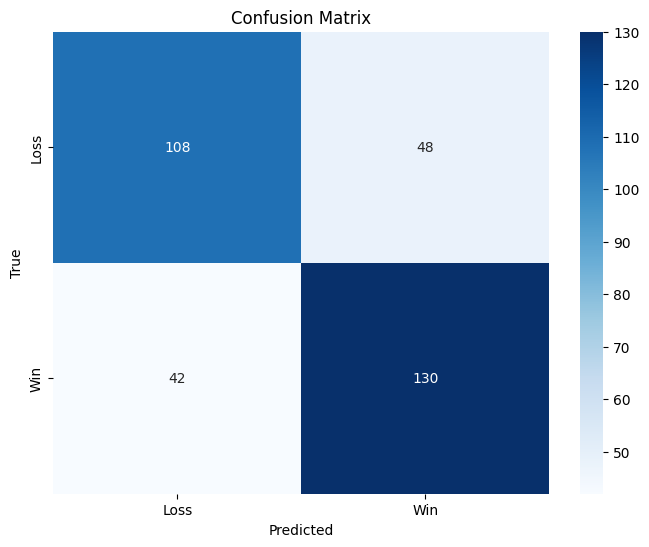

In [26]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


cm = confusion_matrix(y_test, y_pred)

classes = ['Loss', 'Win']  

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()